[View in Colaboratory](https://colab.research.google.com/github/kookoowaa/Projects/blob/master/Churn_with_Online_game/EDA_cwp.ipynb)

In [2]:
#### configuring inline figure size

%pylab  inline
pylab.rcParams ['figure.figsize'] = (24, 10)

Populating the interactive namespace from numpy and matplotlib


In [0]:
#### import dataset from the google drive

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
!pip install --upgrade seaborn
!pip install --upgrade pandas
import pandas as pd
import seaborn as sns

Requirement already up-to-date: seaborn in /usr/local/lib/python2.7/dist-packages (0.9.0)
Requirement already up-to-date: pandas in /usr/local/lib/python2.7/dist-packages (0.23.4)


In [4]:
file_id = '1UKQ6pt47ogMjOi3bsyIuFWf5Bw8Epont'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('label')
label = pd.read_csv('label')
label.head()

,acc_id,label
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week


In [5]:
file_id = '1bsa0jiYWjdLkVV5-ax4h5Hhu9Ev6znhU'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('activity')
activity = pd.read_csv('activity')
activity.head()

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,7,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,4,2.088814,4.405057,-0.245477,4.454059,3.009797,-0.306354,1.184011,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.466939,-0.027758,-0.365536
1,8,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,5,2.673460,4.760178,-0.222527,6.107479,4.758528,-0.306354,1.709534,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,5.070359,-0.027758,-0.365536
2,3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.649522,-0.231021,-0.290803,-0.245978,-0.487666,-0.306354,-0.566706,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
3,4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.658235,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
4,5,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,4,-0.654734,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536


In [6]:
rd = pd.merge(label, activity)
rd.head()

,acc_id,label,wk,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,8,3,1.519815,2.910685,-0.268110,2.852241,2.332910,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,2.161452,-0.027758,-0.365536
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,5,7,4.698532,9.147854,-0.138458,8.584935,5.995250,-0.306354,...,-0.03313,0.319626,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.066084,-0.027758,-0.365536
2,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,6,3,0.632257,0.213292,-0.290501,-0.022940,0.169815,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.167841,-0.027758,-0.365536
3,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,7,6,1.218180,1.787315,-0.159228,1.727487,1.403784,-0.198324,...,-0.03313,0.054378,-0.096277,-0.016574,-0.275174,-0.343293,-0.024028,0.937219,-0.027758,-0.365536
4,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,8,7,0.521166,-0.231874,-0.030257,-0.250423,-0.208689,-0.015505,...,-0.03313,-0.034038,0.187146,-0.016574,-0.275174,-0.343293,-0.024028,1.224318,-0.027758,-0.365536


In [7]:
rd.shape

(440323, 39)

In [8]:
rd['label'] = rd['label'].astype('category')
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440323 entries, 0 to 440322
Data columns (total 39 columns):
acc_id                      440323 non-null object
label                       440323 non-null category
wk                          440323 non-null int64
cnt_dt                      440323 non-null int64
play_time                   440323 non-null float64
npc_exp                     440323 non-null float64
npc_hongmun                 440323 non-null float64
quest_exp                   440323 non-null float64
quest_hongmun               440323 non-null float64
item_hongmun                440323 non-null float64
game_combat_time            440323 non-null float64
get_money                   440323 non-null float64
duel_cnt                    440323 non-null float64
duel_win                    440323 non-null float64
partybattle_cnt             440323 non-null float64
partybattle_win             440323 non-null float64
cnt_enter_inzone_solo       440323 non-null float64
cnt_enter

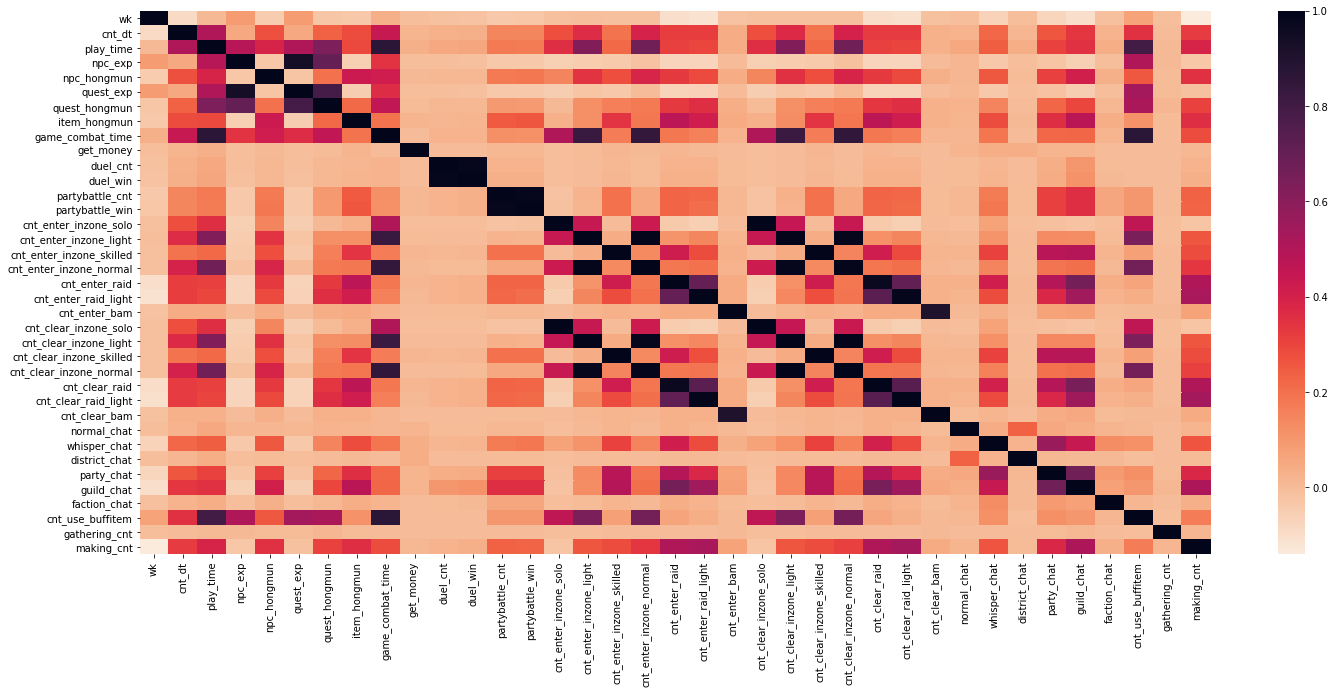

In [9]:
rd_corr = rd.corr()
sns.heatmap(rd_corr, cmap = 'rocket_r')

### - cnt_enter_raid, cnt_enter_raid_light, cnt_clear_raid 간에는 높은 상관관계
### - duel_cnt와 duel_win은 거의 같은 지표라 해도 무방할 정도
### - guild_chat과 party_chat 간의 높은 상관관계
### - quest_hongmun과 quest_exp 간에는 높은 상관관계

In [10]:
rd.iloc[:, 12:14].corr()

,duel_cnt,duel_win
duel_cnt,1.000000,0.985314
duel_win,0.985314,1.000000


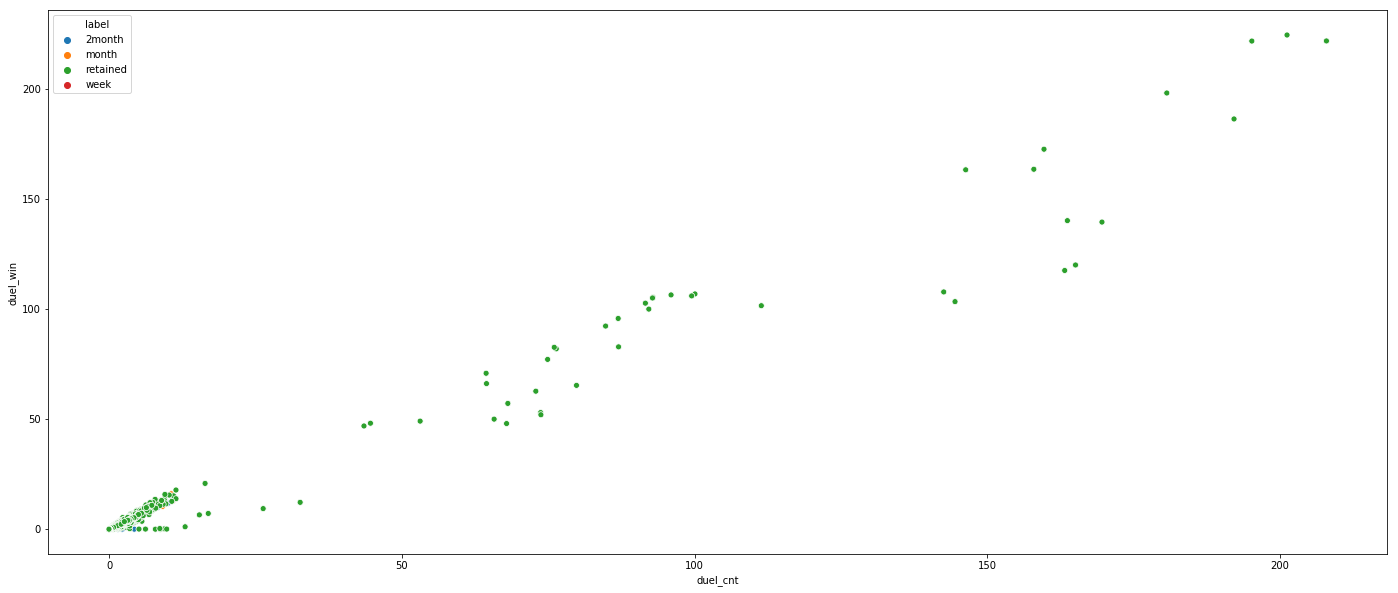

In [11]:
sns.scatterplot(x = 'duel_cnt', y = 'duel_win', hue = 'label', data = rd)

In [12]:
rd.loc[:, ['cnt_enter_raid', 'cnt_enter_raid_light', 'cnt_clear_raid']].corr()

,cnt_enter_raid,cnt_enter_raid_light,cnt_clear_raid
cnt_enter_raid,1.000000,0.704731,0.966273
cnt_enter_raid_light,0.704731,1.000000,0.730706
cnt_clear_raid,0.966273,0.730706,1.000000


In [20]:
rd.loc[:, ['label', 'cnt_enter_raid', 'cnt_enter_raid_light', 'cnt_clear_raid']].stack(level = ['cnt_enter_raid', 'cnt_enter_raid_light', 'cnt_clear_raid', 'label'])

ValueError: ignored

In [0]:



raid_facet = sns.FacetGrid(data = rd, col = 3)
raid_facet.map(sns.scatterplot, )
#sns.scatterplot(x = 'duel_cnt', y = 'duel_win', hue = 'label', data = rd)

KeyError: ignored

In [18]:
max(rd.groupby(['acc_id']).sum()['duel_cnt'])

1358.6235936792089